In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bootstrap_err import BootStrap

def boot_strap(data, data_err):
    boot_data = np.random.normal(data,data_err,len(data))
    
    return boot_data

In [2]:
# construct a population of size 100
np.random.seed(42)
population = np.random.randint(0,100 , size=100)
population

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23])

In [3]:
population.mean()

50.54

In [4]:
population.std()

29.278463074417004

In [5]:
# draw a sample of size 30 from population
sample = np.random.choice(population, size=30)
sample

array([75, 47, 83, 61, 88, 21,  2,  7, 47, 49, 74, 94, 51, 86, 94, 70, 87,
       89, 86, 59, 59, 41, 60, 61, 21, 82,  1,  3, 99, 91])

In [6]:
# our first sample mean
sample_mean = sample.mean()
sample_mean

59.6

In [7]:
# standard deiveation for this sample
sample_std = np.std(sample, ddof=1)
sample_std

30.444522750689348

In [8]:
# estimated standard error for the sapmle mann
sample_std/(30 ** 0.5)

5.558383954343928

In [9]:
# theorical standard error for sapmle mann
population.std()/(30 ** 0.5)

5.345491558313417

In [10]:
# bootstrap resampling from empirical CDF. Since each step of our empirical CDF is identical (1/n), 
# sampling from the empirical CDF is the same as re-sampling (with replacement and equal probabilities) 
# from the sample.
boot_means = []
for _ in range(10000):
    bootsample = np.random.choice(sample,size=30, replace=True)
    boot_means.append(bootsample.mean())

In [11]:
# simulated mean of mean
bootmean = np.mean(boot_means)

In [12]:
# simulated standard deviation of mean
bootmean_std = np.std(boot_means)

In [13]:
# simulated mean VS true mean
(population.mean(), bootmean)

(50.54, 59.66076333333333)

In [14]:
# the theorical standard error and simulated standard error
(population.std()/(30 ** 0.5), bootmean_std)

(5.345491558313417, 5.49753810916911)

In [19]:
x = np.random.normal(1, 2, 100)
x = np.linspace(1,15,100)
y = (0.5*x + 10)+np.random.normal(0, 0.25, 100)
x_outliers = np.random.normal(1,2,5)
y_outliers = (0.5*x_outliers + 10)+np.random.normal(0, 5, 5)

x = np.append(x, x_outliers)
y = np.append(y, y_outliers)

x_err = abs(np.random.normal(0, 0.25, 100))
y_err = abs(np.random.normal(0, 0.25, 100))
y_outlier_err = abs(np.random.normal(0, 3, 5))
y_err = np.append(y_err, y_outlier_err)

x_line = np.arange(-4,6)
y_line = 0.5*x_line +10

z = np.polyfit(x,y,1)
p = np.poly1d(z)

x_fit = np.arange(-4,6)
y_fit = p(x_fit)

In [20]:
boot_data = boot_strap(y,y_err)

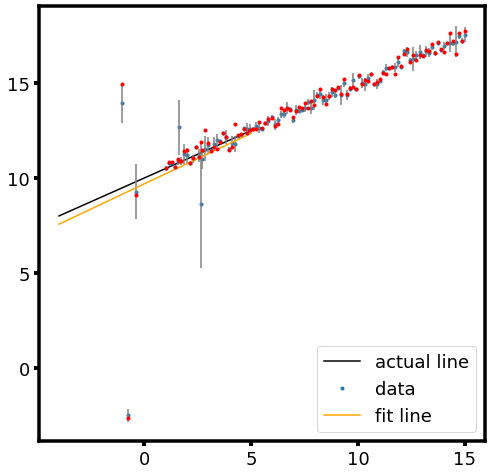

In [21]:
plt.figure(facecolor='w',figsize=(8,8))
plt.plot(x_line,y_line,c='k',label='actual line')
plt.plot(x,y,'.',label='data')
plt.errorbar(x,y,yerr=y_err,c='gray',fmt='None')
plt.plot(x_fit,y_fit,c='orange',label='fit line')
plt.plot(x,boot_data,'.',c='r')
plt.legend()
plt.show()


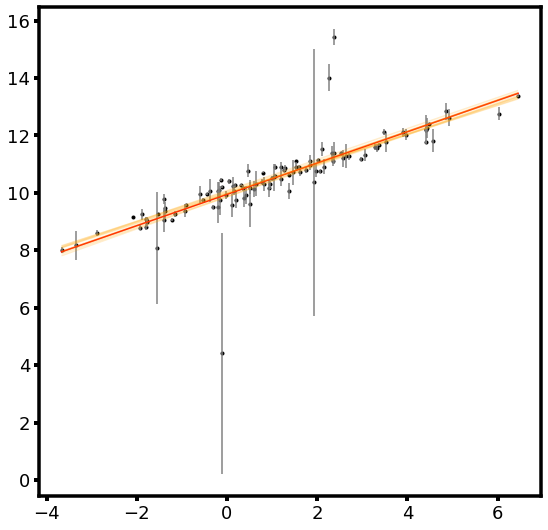

In [18]:
boot = BootStrap(x,y,x_err,y_err,10)
boot.plot_fits()

In [22]:
x = np.arange(100)
y = x**2 + 3*x + 5 + np.random.rand(100)
np.polyfit(x, y, 2)

array([0.99999217, 3.00027968, 5.48426192])

In [24]:
np.polyfit(x, y, 2, cov=True)

(array([0.99999217, 3.00027968, 5.48426192]),
 array([[ 1.59283115e-09, -1.57690284e-07,  2.57560797e-06],
        [-1.57690284e-07,  1.66728008e-05, -3.07527592e-04],
        [ 2.57560797e-06, -3.07527592e-04,  7.65007080e-03]]))